# HuggingFace Library 🤗

## Pipeline

The most basic object in the 🤗 Transformers library is the pipeline() function. It connects a model with its necessary preprocessing and postprocessing steps, allowing us to directly input any text and get an intelligible answer:

Some of the currently available pipelines are:

- feature-extraction (get the vector representation of a text)
- fill-mask
- ner (named entity recognition)
- question-answering
- sentiment-analysis
- summarization
- text-generation
- translation
- zero-shot-classification

Let’s have a look at a few of these!

In [1]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier("I've been waiting for a HuggingFace course my whole life.")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
Downloading: 100%|██████████| 629/629 [00:00<00:00, 651kB/s]
Downloading: 100%|██████████| 255M/255M [00:15<00:00, 17.1MB/s] 
Downloading: 100%|██████████| 48.0/48.0 [00:00<00:00, 48.0kB/s]
Downloading: 100%|██████████| 226k/226k [00:00<00:00, 582kB/s] 


[{'label': 'POSITIVE', 'score': 0.9598047137260437}]

In [2]:
classifier = pipeline("zero-shot-classification")
classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)
Downloading: 100%|██████████| 1.13k/1.13k [00:00<00:00, 591kB/s]
Downloading: 100%|██████████| 1.52G/1.52G [01:32<00:00, 17.6MB/s]
Downloading: 100%|██████████| 26.0/26.0 [00:00<00:00, 8.67kB/s]
Downloading: 100%|██████████| 878k/878k [00:00<00:00, 1.12MB/s]
Downloading: 100%|██████████| 446k/446k [00:00<00:00, 761kB/s] 
Downloading: 100%|██████████| 1.29M/1.29M [00:00<00:00, 1.37MB/s]


{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8445968627929688, 0.1119757667183876, 0.04342740774154663]}

In [3]:
from transformers import pipeline

generator = pipeline("text-generation")
generator("In this course, we will teach you how to")

No model was supplied, defaulted to gpt2 (https://huggingface.co/gpt2)
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to easily convert your email client into one of the top-performing email apps of 2016.\n\nOur focus is your first two weeks of use. Your email is going to be stored on a central cloud'}]

In [4]:
from transformers import pipeline

unmasker = pipeline("fill-mask")
unmasker("This course will teach you all about <mask> models.", top_k=2)

No model was supplied, defaulted to distilroberta-base (https://huggingface.co/distilroberta-base)
Downloading: 100%|██████████| 480/480 [00:00<00:00, 480kB/s]
Downloading: 100%|██████████| 316M/316M [00:23<00:00, 14.3MB/s] 
Downloading: 100%|██████████| 878k/878k [00:00<00:00, 1.12MB/s]
Downloading: 100%|██████████| 446k/446k [00:00<00:00, 756kB/s] 
Downloading: 100%|██████████| 1.29M/1.29M [00:01<00:00, 1.35MB/s]


[{'score': 0.1961982101202011,
  'token': 30412,
  'token_str': ' mathematical',
  'sequence': 'This course will teach you all about mathematical models.'},
 {'score': 0.04052715376019478,
  'token': 38163,
  'token_str': ' computational',
  'sequence': 'This course will teach you all about computational models.'}]

In [5]:
from transformers import pipeline

question_answerer = pipeline("question-answering")
question_answerer(
    question="Where do I work?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn",
)

No model was supplied, defaulted to distilbert-base-cased-distilled-squad (https://huggingface.co/distilbert-base-cased-distilled-squad)
Downloading: 100%|██████████| 473/473 [00:00<00:00, 459kB/s]
Downloading: 100%|██████████| 249M/249M [00:14<00:00, 17.6MB/s] 
Downloading: 100%|██████████| 29.0/29.0 [00:00<00:00, 14.5kB/s]
Downloading: 100%|██████████| 208k/208k [00:00<00:00, 538kB/s] 
Downloading: 100%|██████████| 426k/426k [00:00<00:00, 735kB/s] 


{'score': 0.6949762105941772, 'start': 33, 'end': 45, 'answer': 'Hugging Face'}

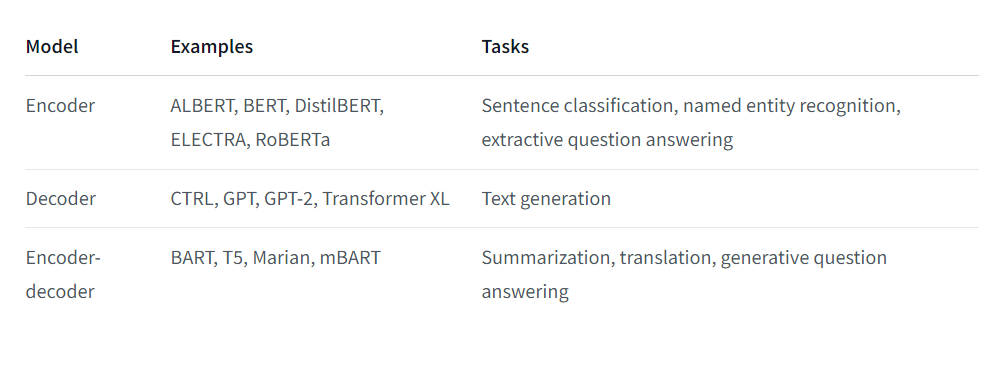

## Pipeline Function in Detail

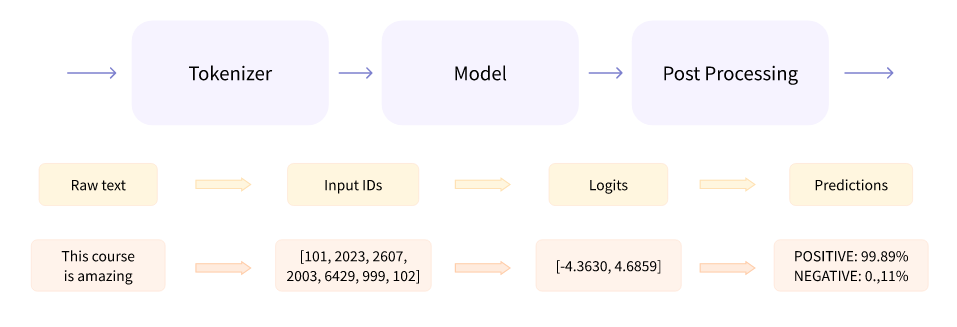

### Tokenization

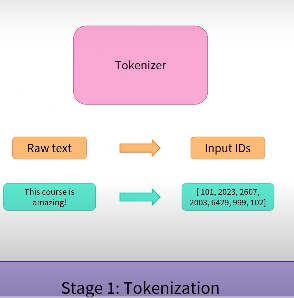 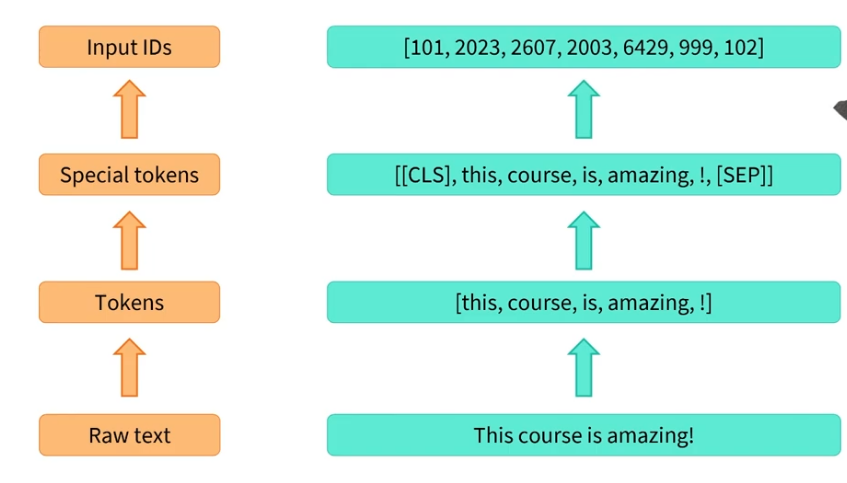

In [7]:
from transformers import AutoModel

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint)

Some weights of the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [9]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}


In [10]:
outputs = model(**inputs)

In [14]:
outputs.last_hidden_state.shape

torch.Size([2, 16, 768])

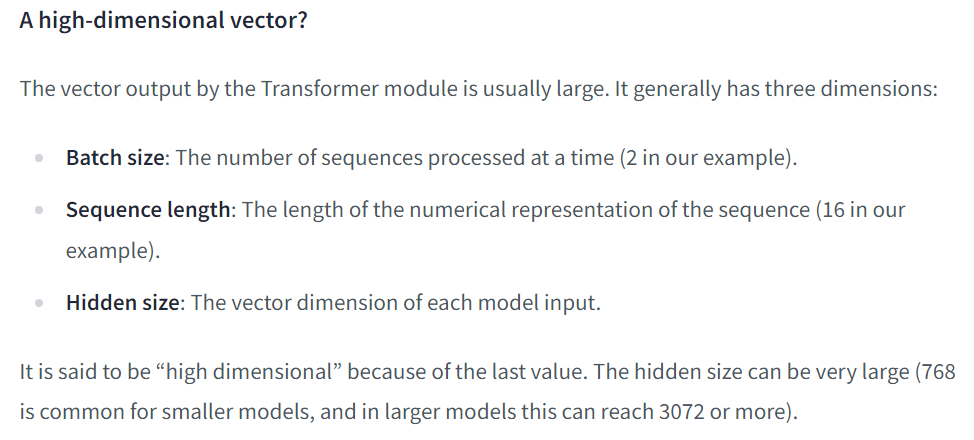

### Model

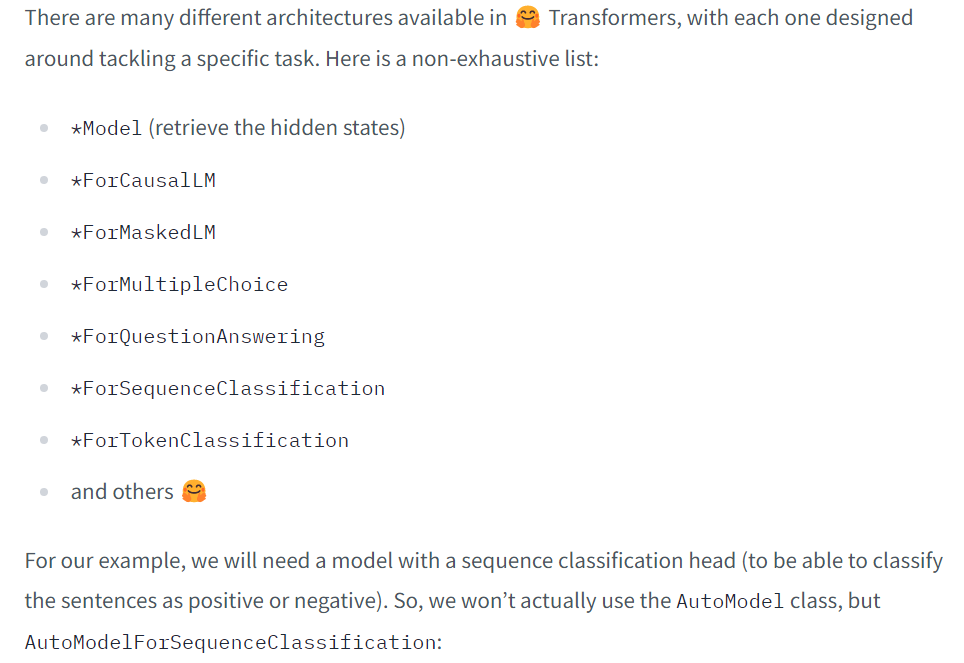

In [15]:
from transformers import AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(**inputs)

In [16]:
print(outputs.logits.shape)

torch.Size([2, 2])


In [18]:
outputs.logits

tensor([[-1.5607,  1.6123],
        [ 4.1692, -3.3464]], grad_fn=<AddmmBackward>)

### Postprocessing

In [20]:
import torch
torch.nn.functional.softmax(outputs.logits, dim=1)

tensor([[4.0195e-02, 9.5980e-01],
        [9.9946e-01, 5.4418e-04]], grad_fn=<SoftmaxBackward>)

In [22]:
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}

## Creating a Transformer

In [23]:
from transformers import BertConfig, BertModel

# Building the config
config = BertConfig()

# Building the model from the config and random initialization
model = BertModel(config)

In [24]:
print(config)

BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.19.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



In [25]:
from transformers import BertModel

#Loading from pretrained
model = BertModel.from_pretrained("bert-base-cased")

Downloading: 100%|██████████| 570/570 [00:00<00:00, 286kB/s]
Downloading: 100%|██████████| 416M/416M [00:26<00:00, 16.3MB/s]   
Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [27]:
model.save_pretrained("saved_bert_model_dir")

# we can load this model using BertModel.from_pretrained("saved_bert_model_dir")


In [28]:
sequences = ["Hello!", "Cool.", "Nice!"]

# The above would be passed through the tokenizer to generate the encoded representation

encoded_sequences = [
    [101, 7592, 999, 102],
    [101, 4658, 1012, 102],
    [101, 3835, 999, 102],
]

In [31]:
model(torch.tensor(encoded_sequences))

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 4.4496e-01,  4.8276e-01,  2.7797e-01,  ..., -5.4033e-02,
           3.9394e-01, -9.4770e-02],
         [ 2.4943e-01, -4.4093e-01,  8.1772e-01,  ..., -3.1917e-01,
           2.2992e-01, -4.1172e-02],
         [ 1.3668e-01,  2.2518e-01,  1.4502e-01,  ..., -4.6915e-02,
           2.8224e-01,  7.5565e-02],
         [ 1.1789e+00,  1.6738e-01, -1.8187e-01,  ...,  2.4671e-01,
           1.0441e+00, -6.1973e-03]],

        [[ 3.6436e-01,  3.2465e-02,  2.0258e-01,  ...,  6.0110e-02,
           3.2451e-01, -2.0996e-02],
         [ 7.1866e-01, -4.8725e-01,  5.1740e-01,  ..., -4.4012e-01,
           1.4553e-01, -3.7545e-02],
         [ 3.3223e-01, -2.3271e-01,  9.4876e-02,  ..., -2.5268e-01,
           3.2172e-01,  8.1117e-04],
         [ 1.2523e+00,  3.5754e-01, -5.1320e-02,  ..., -3.7840e-01,
           1.0526e+00, -5.6255e-01]],

        [[ 2.4042e-01,  1.4718e-01,  1.2110e-01,  ...,  7.6062e-02,
           3.3564e-01,  2